<a href="https://colab.research.google.com/github/MohammadJavad14/computer-vision/blob/main/Keras_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 52s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

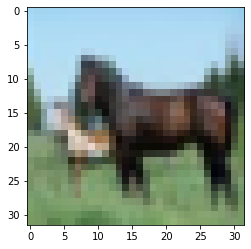

In [ ]:
plt.imshow(x_train[12])

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train / 255

In [ ]:
x_test = x_test / 255

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

2021-10-15 19:50:07.435807: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5046 - accuracy: 0.4602
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1489 - accuracy: 0.6008
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0038 - accuracy: 0.6527
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9017 - accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8192 - accuracy: 0.7186
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7607 - accuracy: 0.7397
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7064 - accuracy: 0.7597
Epoch 8/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6605 - accuracy: 0.7772
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6176 - accuracy: 0.7904
Epoch 10/10
1563/1563 [==============================] - 18s 11m

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1879 - accuracy: 0.6402


[1.1879308223724365, 0.6402000188827515]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict(x_test)

In [ ]:
import numpy as np
predictions = np.round(predictions)

In [ ]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63      1000
           1       0.86      0.69      0.77      1000
           2       0.67      0.40      0.50      1000
           3       0.57      0.38      0.45      1000
           4       0.60      0.65      0.62      1000
           5       0.68      0.43      0.53      1000
           6       0.61      0.82      0.70      1000
           7       0.91      0.52      0.66      1000
           8       0.70      0.79      0.74      1000
           9       0.81      0.66      0.72      1000

   micro avg       0.71      0.59      0.64     10000
   macro avg       0.72      0.59      0.63     10000
weighted avg       0.72      0.59      0.63     10000
 samples avg       0.59      0.59      0.59     10000



/home/mohammad/cv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
